In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
file=files.upload()

Saving company_response1.xlsx to company_response1.xlsx


In [ ]:
df=pd.read_excel('company_response1.xlsx')
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Consumer disputed?,Complaint ID,Company response to consumer
0,05-06-2019,Credit card or prepaid card,General purpose card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,AMERICAN EXPRESS COMPANY,CT,NaN,Web,05-06-2019,Yes,NaN,3233799,Closed with monetary relief
1,05-06-2019,Bank account or service,Checking account,Managing an account,Problem using a debit or ATM card,"MUFG UNION BANK, NATIONAL ASSOCIATION",OR,NaN,Referral,05-07-2019,Yes,NaN,3235212,Closed with monetary relief
2,05-06-2019,Loan reports,Credit reporting,Incorrect information on your report,Account status incorrect,Garcadia Financial LLC,TX,NaN,Web,05-06-2019,Yes,NaN,3234048,Closed with monetary relief
3,05-05-2019,Bank account or service,Checking account,Managing an account,Banking errors,WELLS FARGO & COMPANY,CA,NaN,Web,05-05-2019,Yes,NaN,3232636,Closed with monetary relief
4,05-04-2019,Credit card or prepaid card,General purpose card,Fees or interest,Problem with fees,CAPITAL ONE FINANCIAL CORPORATION,CA,NaN,Web,05-04-2019,Yes,NaN,3232507,Closed with monetary relief


In [ ]:
df['State'].nunique()

62

In [ ]:
df.isnull().sum()/len(df)*100

Date received                    0.000000
Product                          0.000000
Sub-product                     19.118360
Issue                            0.000000
Sub-issue                       45.785805
Company                          0.000000
State                            1.825073
Consumer consent provided?      37.344842
Submitted via                    0.000000
Date sent to company             0.000000
Timely response?                 0.000000
Consumer disputed?              45.134635
Complaint ID                     0.000000
Company response to consumer     0.000000
dtype: float64

In [ ]:
df.shape

(111338, 14)

In [ ]:
df['State']=df['State'].fillna(df['State'].mode()[0])

In [ ]:
df['State'].mode()[0]

'CA'

In [ ]:
df.isnull().sum()/len(df)*100

Date received                    0.000000
Product                          0.000000
Sub-product                     19.118360
Issue                            0.000000
Sub-issue                       45.785805
Company                          0.000000
State                            0.000000
Consumer consent provided?      37.344842
Submitted via                    0.000000
Date sent to company             0.000000
Timely response?                 0.000000
Consumer disputed?              45.134635
Complaint ID                     0.000000
Company response to consumer     0.000000
dtype: float64

In [ ]:
df.Product.unique()

array(['Credit card or prepaid card', 'Checking or savings account',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Mortgage', 'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease', 'Debt collection',
       'Payday loan, title loan, or personal loan', 'Student loan',
       'Consumer Loan', 'Credit card', 'Bank account or service',
       'Prepaid card', 'Credit reporting', 'Payday loan',
       'Money transfers', 'Other financial service', 'Virtual currency'],
      dtype=object)

In [ ]:
df.Product=df.Product.replace({'Credit card':'Credit card or prepaid card','Prepaid card':'Credit card or prepaid card','Vehicle loan or lease':'Loan','Payday loan, title loan, or personal loan':'Loan',
                    'Mortgage':'Loan','Student loan':'Loan','Consumer Loan':'Loan','Checking or savings account':'Bank account or service','Money transfer, virtual currency, or money service':'Bank account or service',
                    'Money transfers':'Bank account or service'})

In [ ]:
df.Product.value_counts()

Bank account or service                                                         26850
Credit card or prepaid card                                                     25579
Loan                                                                            23605
Debt collection                                                                 14330
Credit reporting, credit repair services, or other personal consumer reports    13339
Credit reporting                                                                 6982
Payday loan                                                                       483
Other financial service                                                           168
Virtual currency                                                                    2
Name: Product, dtype: int64

In [ ]:
df.Product=df.Product.replace({'Other financial service':'Bank account or service','Virtual currency':'Bank account or service','Payday loan':'Loan',
                                'Credit reporting, credit repair services, or other personal consumer reports':'Loan reports','Credit reporting':'Loan reports'})

In [ ]:
df.Product.value_counts()

Bank account or service        27020
Credit card or prepaid card    25579
Loan                           24088
Loan reports                   20321
Debt collection                14330
Name: Product, dtype: int64

In [ ]:
groups = df.groupby(['Product'])

In [ ]:
groups.get_group('Loan')['Sub-product'].unique()

array(['Conventional home mortgage', 'Loan', 'VA mortgage',
       'Personal line of credit', 'Title loan', 'Installment loan',
       'Federal student loan servicing', 'FHA mortgage',
       'Other type of mortgage', 'Lease',
       'Home equity loan or line of credit (HELOC)',
       'Private student loan', 'Payday loan', 'Reverse mortgage',
       'Pawn loan', 'Non-federal student loan',
       'Conventional adjustable mortgage (ARM)', 'Vehicle loan', nan,
       'Vehicle lease', 'Other mortgage', 'Conventional fixed mortgage',
       'Home equity loan or line of credit', 'Second mortgage'],
      dtype=object)

In [ ]:
df['Sub-product']=df['Sub-product'].replace({'Home equity loan or line of credit (HELOC)':'Home equity loan or line of credit',
                                             'Other type of mortgage':'Other mortgage','VA mortgage':'Personal line of credit','FHA mortgage':'Personal line of credit',
                                             'Vehicle lease':'Lease','Reverse mortgage':'Lease'})

In [ ]:
groups.get_group('Loan')['Sub-product'].unique()

array(['Conventional home mortgage', 'Loan', 'Personal line of credit',
       'Title loan', 'Installment loan', 'Federal student loan servicing',
       'Other mortgage', 'Lease', 'Home equity loan or line of credit',
       'Private student loan', 'Payday loan', 'Pawn loan',
       'Non-federal student loan',
       'Conventional adjustable mortgage (ARM)', 'Vehicle loan', nan,
       'Conventional fixed mortgage', 'Second mortgage'], dtype=object)

In [ ]:
#df.Issue.unique()

In [ ]:
df['Sub-product'].value_counts()

Checking account                              19076
Credit reporting                              12972
General-purpose credit card or charge card     7809
Conventional fixed mortgage                    3872
Other mortgage                                 3866
                                              ...  
Transit card                                     16
Pawn loan                                        14
Check cashing service                            14
Electronic Benefit Transfer / EBT card            3
Second mortgage                                   2
Name: Sub-product, Length: 69, dtype: int64

In [ ]:
df['Sub-product'].unique()

array(['General-purpose credit card or charge card', 'Checking account',
       'Credit reporting', 'Other banking product or service',
       'Conventional home mortgage', 'Mobile or digital wallet', 'Loan',
       'Store credit card', 'I do not know', 'Credit repair services',
       'Personal line of credit', 'Domestic (US) money transfer',
       'Savings account', 'Gift card', 'International money transfer',
       'Title loan', 'Other debt', 'Government benefit card',
       'Installment loan', 'Federal student loan servicing',
       'Virtual currency', 'General-purpose prepaid card',
       'Other mortgage', 'Lease', 'Home equity loan or line of credit',
       'Credit card debt', 'Auto debt', 'Private student loan',
       'Payday loan debt', 'Check cashing service',
       'CD (Certificate of Deposit)', 'Other personal consumer report',
       'Medical debt', 'Payroll card',
       "Traveler's check or cashier's check", 'Foreign currency exchange',
       'Money order', 'Refu

In [ ]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Charged fees or interest I didn't expect")]['Sub-product'].index

In [ ]:
df['Sub-product'].nunique()

69

In [ ]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Applied for loan/did not receive money")]['Sub-product'].index

In [ ]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Can't stop charges to bank account")]['Sub-product'].index

In [ ]:
for i in ind:
  df['Sub-product'][i]='Pawn loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Charged bank acct wrong day or amt")]['Sub-product'].index

In [ ]:
for i in ind:
  df['Sub-product'][i]='Pawn loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Payment to acct not credited")]['Sub-product'].index

In [ ]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Received a loan I didn't apply for")]['Sub-product'].index

In [ ]:
for i in ind:
  df['Sub-product'][i]='Pawn loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Can't contact lender")]['Sub-product'].index

In [ ]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.isnull().sum()/len(df)*100

Date received                    0.000000
Product                          0.000000
Sub-product                     18.684546
Issue                            0.000000
Sub-issue                       45.785805
Company                          0.000000
State                            0.000000
Consumer consent provided?      37.344842
Submitted via                    0.000000
Date sent to company             0.000000
Timely response?                 0.000000
Consumer disputed?              45.134635
Complaint ID                     0.000000
Company response to consumer     0.000000
dtype: float64

In [ ]:
groups.get_group('Bank account or service')['Sub-product'].unique()

array(['Checking account', 'Other banking product or service',
       'Mobile or digital wallet', 'Domestic (US) money transfer',
       'Savings account', 'International money transfer',
       'Virtual currency', 'Check cashing service',
       'CD (Certificate of Deposit)',
       "Traveler's check or cashier's check", 'Foreign currency exchange',
       'Money order', 'Refund anticipation check', 'Debt settlement',
       'Personal line of credit', 'Other bank product/service',
       '(CD) Certificate of deposit', 'Traveler’s/Cashier’s checks',
       'Credit repair', 'Check cashing',
       'Cashing a check without an account'], dtype=object)

In [ ]:
df['Sub-product']=df['Sub-product'].replace({'(CD) Certificate of deposit':'CD (Certificate of Deposit)','Check cashing':'Check cashing service',
                                             'Other bank product/service':'Other banking product or service','Traveler’s/Cashier’s checks':"Traveler's check or cashier's check",
                                             })

In [ ]:
groups.get_group('Bank account or service')['Sub-product'].unique()

array(['Checking account', 'Other banking product or service',
       'Mobile or digital wallet', 'Domestic (US) money transfer',
       'Savings account', 'International money transfer',
       'Virtual currency', 'Check cashing service',
       'CD (Certificate of Deposit)',
       "Traveler's check or cashier's check", 'Foreign currency exchange',
       'Money order', 'Refund anticipation check', 'Debt settlement',
       'Personal line of credit', 'Credit repair',
       'Cashing a check without an account'], dtype=object)

In [ ]:
groups.get_group('Credit card or prepaid card')['Sub-product'].unique()

array(['General-purpose credit card or charge card', 'Store credit card',
       'Gift card', 'Government benefit card',
       'General-purpose prepaid card', 'Payroll card', nan,
       'General purpose card', 'Government benefit payment card',
       'Gift or merchant card', 'Mobile wallet', 'ID prepaid card',
       'Other special purpose card',
       'Electronic Benefit Transfer / EBT card', 'Transit card'],
      dtype=object)

In [ ]:
df['Sub-product']=df['Sub-product'].replace({'General-purpose credit card or charge card':'General purpose card','Government benefit payment card':'Government benefit card',
                                             'General-purpose prepaid card':'General purpose card','Gift card':'Gift or merchant card'})

In [ ]:
groups.get_group('Credit card or prepaid card')['Sub-product'].unique()

array(['General purpose card', 'Store credit card',
       'Gift or merchant card', 'Government benefit card', 'Payroll card',
       nan, 'Mobile wallet', 'ID prepaid card',
       'Other special purpose card',
       'Electronic Benefit Transfer / EBT card', 'Transit card'],
      dtype=object)

In [ ]:
groups.get_group('Credit card or prepaid card')['Sub-product'].value_counts()

General purpose card                      8877
Store credit card                         1826
Government benefit card                    357
Gift or merchant card                      241
Payroll card                               227
Mobile wallet                               85
ID prepaid card                             71
Other special purpose card                  55
Transit card                                16
Electronic Benefit Transfer / EBT card       3
Name: Sub-product, dtype: int64

In [ ]:
ind=df[(df['Product']=='Credit card or prepaid card') & (df['Sub-product'].isnull()==True)].index

In [ ]:
len(df[(df['Sub-product'].isnull()==True)]['Product'])

20803

In [ ]:
for i in ind:
  df['Sub-product'][i]='General purpose card'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.isnull().sum()

Date received                       0
Product                             0
Sub-product                      6982
Issue                               0
Sub-issue                       50977
Company                             0
State                               0
Consumer consent provided?      41579
Submitted via                       0
Date sent to company                0
Timely response?                    0
Consumer disputed?              50252
Complaint ID                        0
Company response to consumer        0
dtype: int64

In [ ]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Can't contact lender")]['Sub-product'].index

In [ ]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
groups.get_group('Loan reports')['Sub-product'].value_counts()

Credit reporting                  12972
Other personal consumer report      235
Credit repair services              132
Name: Sub-product, dtype: int64

In [ ]:
ind=df[(df['Product']=='Loan reports') & (df['Sub-product'].isnull()==True)].index

In [ ]:
for i in ind:
  df['Sub-product'][i]='Credit reporting'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
100*df.isnull().sum()/len(df)

Date received                    0.000000
Product                          0.000000
Sub-product                      0.000000
Issue                            0.000000
Sub-issue                       45.785805
Company                          0.000000
State                            0.000000
Consumer consent provided?      37.344842
Submitted via                    0.000000
Date sent to company             0.000000
Timely response?                 0.000000
Consumer disputed?              45.134635
Complaint ID                     0.000000
Company response to consumer     0.000000
dtype: float64

In [ ]:
df=df.drop(['Sub-issue','Consumer consent provided?','Consumer disputed?'],axis=1)

In [ ]:
100*df.isnull().sum()/len(df)

Date received                   0.0
Product                         0.0
Sub-product                     0.0
Issue                           0.0
Company                         0.0
State                           0.0
Submitted via                   0.0
Date sent to company            0.0
Timely response?                0.0
Complaint ID                    0.0
Company response to consumer    0.0
dtype: float64

In [ ]:
def regions(x):
    if x in ['WA','MT','OR','ID','WY','CA','NV','UT','CO','AK']:
        return('West')
    if x in ['AZ','NM','TX','OK','HI']:
        return ('Southwest')
    if x in ['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH']:
        return ('Midwest')
    if x in ['LA','AR','MS','AL','GA','FL','KY','TN','SC','NC','VA','DC','WV','DE','MD','PR','VI']:
        return ('Southeast')
    if x in ['PA','NJ','NY','CT','RI','MA','NH','VT','ME','GU']:
        return ('Northeast')
    if x in ['AE','AP','AA']:
        return ('Armedforces')

In [ ]:
df['Regions']=df['State'].apply(regions)

In [ ]:
df['Regions'].nunique()

6

In [ ]:
df['Date sent to company']=pd.to_datetime(df['Date sent to company'])
df['Date received']=pd.to_datetime(df['Date received'])

In [ ]:
df['Date sent to company']

0        2019-05-06
1        2019-05-07
2        2019-05-06
3        2019-05-05
4        2019-05-04
            ...    
111333   2017-12-10
111334   2018-03-23
111335   2016-10-01
111336   2015-07-06
111337   2018-11-10
Name: Date sent to company, Length: 111338, dtype: datetime64[ns]

In [ ]:
df['Duration']=df['Date sent to company']-df['Date received']


In [ ]:
df['Duration']=df.Duration.dt.days

In [ ]:
df=df.drop(['Date sent to company','Date received','Complaint ID'],axis=1)

In [ ]:
df=df.drop('State',axis=1)

In [ ]:
df.head()

,Product,Sub-product,Issue,Company,Submitted via,Timely response?,Company response to consumer,Regions,Duration
0,Credit card or prepaid card,General purpose card,"Advertising and marketing, including promotion...",AMERICAN EXPRESS COMPANY,Web,Yes,Closed with monetary relief,Northeast,0
1,Bank account or service,Checking account,Managing an account,"MUFG UNION BANK, NATIONAL ASSOCIATION",Referral,Yes,Closed with monetary relief,West,1
2,Loan reports,Credit reporting,Incorrect information on your report,Garcadia Financial LLC,Web,Yes,Closed with monetary relief,Southwest,0
3,Bank account or service,Checking account,Managing an account,WELLS FARGO & COMPANY,Web,Yes,Closed with monetary relief,West,0
4,Credit card or prepaid card,General purpose card,Fees or interest,CAPITAL ONE FINANCIAL CORPORATION,Web,Yes,Closed with monetary relief,West,0


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(111320, 9)

In [ ]:

df.Company.value_counts()

BANK OF AMERICA, NATIONAL ASSOCIATION    10230
CITIBANK, N.A.                            8204
JPMORGAN CHASE & CO.                      7439
WELLS FARGO & COMPANY                     6812
EQUIFAX, INC.                             5921
                                         ...  
FIRST PRIORITY MORTGAGE, INC.                1
Grandeagle Financial, LLC                    1
Parnell & Parnell, PA                        1
Bonded Adjustment Company                    1
NAFCO Finance                                1
Name: Company, Length: 2490, dtype: int64

In [ ]:
#issues_by_company=df.groupby(['Company']).count()['Issue'].sort_values(ascending=False)

In [ ]:
# df.to_excel('com_res.xlsx')
# files.download('com_res.xlsx')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_excel('/content/com_res_final copy.xlsx')

In [6]:
data.head()

,Product,Sub-product,Issue,Company,Submitted via,Timely response?,Company response to consumer,Regions,Duration
0,Credit card or prepaid card,General purpose card,Advertising and marketing,AMERICAN EXPRESS COMPANY,Web,Yes,Closed with monetary relief,Northeast,0
1,Bank account or service,Checking account,"Account opening, closing, or management","MUFG UNION BANK, NATIONAL ASSOCIATION",Referral,Yes,Closed with monetary relief,West,1
2,Loan reports,Credit reporting,Credit Report/score,Garcadia Financial LLC,Web,Yes,Closed with monetary relief,Southwest,0
3,Bank account or service,Checking account,"Account opening, closing, or management",WELLS FARGO & COMPANY,Web,Yes,Closed with monetary relief,West,0
4,Credit card or prepaid card,General purpose card,Wrong amount charged or received,CAPITAL ONE FINANCIAL CORPORATION,Web,Yes,Closed with monetary relief,West,0


In [8]:
pd.crosstab(data['Product'],data['Company response to consumer']).sort_values('Closed with monetary relief',ascending=False)

Company response to consumer,Closed with monetary relief,Closed with non-monetary relief
Product,,
Bank account or service,21907,5105
Credit card or prepaid card,20869,4705
Loan,9333,14753
Debt collection,2095,12229
Loan reports,1452,18868


In [ ]:
# Debt collection has low issues closed with monetary relief despite of having higher count of issues. 

In [9]:
pd.crosstab(data['Sub-product'],data['Company response to consumer']).sort_values('Closed with monetary relief',ascending=False).head()

Company response to consumer,Closed with monetary relief,Closed with non-monetary relief
Sub-product,,
General purpose card,18450,4243
Checking account,16261,2809
Other banking product or service,2782,1045
Conventional fixed mortgage,1589,2282
Store credit card,1492,334


In [11]:
data.groupby(['Product','Sub-product'])['Company response to consumer'].value_counts()

Product                  Sub-product                         Company response to consumer   
Bank account or service  CD (Certificate of Deposit)         Closed with monetary relief          281
                                                             Closed with non-monetary relief      155
                         Cashing a check without an account  Closed with non-monetary relief       23
                                                             Closed with monetary relief           19
                         Check cashing service               Closed with monetary relief           23
                                                                                                ...  
Loan reports             Credit repair services              Closed with non-monetary relief       39
                         Credit reporting                    Closed with non-monetary relief    18617
                                                             Closed with monetary relief   

In [12]:
with_monetary_relief = data[data['Company response to consumer']=='Closed with monetary relief']

In [13]:
with_monetary_relief.groupby(['Product','Sub-product'])['Company response to consumer'].count().to_frame().sort_values('Company response to consumer',ascending=False).head(10)

Company response to consumer
Product                     Sub-product                                                   
Credit card or prepaid card General purpose card                                     18450
Bank account or service     Checking account                                         16261
                            Other banking product or service                          2782
Loan                        Conventional fixed mortgage                               1589
Credit card or prepaid card Store credit card                                         1492
Loan reports                Credit reporting                                          1336
Loan                        Personal line of credit                                   1208
                            Other mortgage                                            1160
Bank account or service     Savings account                                           1153
Loan                        Installment loan                                           829

In [14]:
data['Issue'].value_counts().head()

Account opening, closing, or management    15237
Credit Report/score                        14420
Credit card application and management      6834
Attempts to collect debt not owed           6026
Problem caused by your funds being low      4899
Name: Issue, dtype: int64

In [15]:
data['Company'].value_counts().head()

BANK OF AMERICA, NATIONAL ASSOCIATION    10230
CITIBANK, N.A.                            8201
JPMORGAN CHASE & CO.                      7439
WELLS FARGO & COMPANY                     6811
EQUIFAX, INC.                             5921
Name: Company, dtype: int64

In [17]:
regions = pd.crosstab(data['Regions'],data['Company response to consumer']).sort_values('Closed with monetary relief',ascending=0)
regions['monetary relief percentage']=regions['Closed with monetary relief']/(regions['Closed with monetary relief']+regions['Closed with non-monetary relief'])*100
regions

Company response to consumer,Closed with monetary relief,Closed with non-monetary relief,monetary relief percentage
Regions,,,
Southeast,15318,18478,45.324891
West,13405,12094,52.570689
Northeast,12412,9578,56.443838
Midwest,8596,8608,49.965124
Southwest,5883,6867,46.141176
Armedforces,42,35,54.545455


In [18]:
data.groupby('Regions')['Duration'].max()

Regions
Armedforces     59
Midwest        573
Northeast      306
Southeast      446
Southwest      321
West           588
Name: Duration, dtype: int64

In [19]:
max(data['Duration'])

588

In [20]:
data.groupby('Regions')['Duration'].mean()

Regions
Armedforces    2.649351
Midwest        2.403104
Northeast      2.206185
Southeast      2.231033
Southwest      2.447451
West           2.400447
Name: Duration, dtype: float64

In [21]:
data.groupby('Regions')['Duration'].min()

Regions
Armedforces    0
Midwest        0
Northeast      0
Southeast      0
Southwest      0
West           0
Name: Duration, dtype: int64

In [23]:
obs = pd.crosstab(data['Regions'],data['Company response to consumer'])
obs

Company response to consumer,Closed with monetary relief,Closed with non-monetary relief
Regions,,
Armedforces,42,35
Midwest,8596,8608
Northeast,12412,9578
Southeast,15318,18478
Southwest,5883,6867
West,13405,12094


In [24]:
from scipy import stats

In [25]:
stats.chi2_contingency(obs,correction=False)

(804.693368084944,
 1.1167034172695384e-171,
 5,
 array([[   38.49861655,    38.50138345],
        [ 8601.69089798,  8602.30910202],
        [10994.60490855, 10995.39509145],
        [16897.39279169, 16898.60720831],
        [ 6374.77092242,  6375.22907758],
        [12749.0418628 , 12749.9581372 ]]))

In [26]:
obs1 = pd.crosstab(data['Company'],data['Company response to consumer'])
stats.chi2_contingency(obs1,correction=True)

(49870.108216855166, 0.0, 2489, array([[ 0.99996407,  1.00003593],
        [ 0.49998203,  0.50001797],
        [ 0.49998203,  0.50001797],
        ...,
        [ 0.49998203,  0.50001797],
        [37.99863452, 38.00136548],
        [ 0.49998203,  0.50001797]]))

In [27]:
obs1

Company response to consumer,Closed with monetary relief,Closed with non-monetary relief
Company,,
"1 STOP MONEY CENTERS, LLC",1,1
1ST 2ND MORTGAGE CO. OF NJ INC,0,1
"1ST ALLIANCE LENDING, LLC",1,0
"1st Capital Mortgage, LLC",0,1
1st Franklin Financial Corporation,0,6
...,...,...
iFreedom Direct Corporation,2,0
"iQuantified Management Services, LLC",0,1
iServe Trust,0,1


In [28]:
obs2 = pd.crosstab(data['Product'],data['Company response to consumer'])
stats.chi2_contingency(obs2,correction=False)

(43983.91301772006, 0.0, 4, array([[13505.51467893, 13506.48532107],
        [12786.54051529, 12787.45948471],
        [ 7161.74264257,  7162.25735743],
        [12042.56724999, 12043.43275001],
        [10159.63491322, 10160.36508678]]))

In [29]:
obs2

Company response to consumer,Closed with monetary relief,Closed with non-monetary relief
Product,,
Bank account or service,21907,5105
Credit card or prepaid card,20869,4705
Debt collection,2095,12229
Loan,9333,14753
Loan reports,1452,18868


In [30]:
obs3 = pd.crosstab(data['Sub-product'],data['Company response to consumer'])
stats.chi2_contingency(obs3,correction=True)

(46285.25671223797, 0.0, 60, array([[1.07496137e+02, 1.07503863e+02],
        [1.08496101e+02, 1.08503899e+02],
        [2.17992166e+02, 2.18007834e+02],
        [2.09992454e+01, 2.10007546e+01],
        [1.99992813e+01, 2.00007187e+01],
        [9.53465737e+03, 9.53534263e+03],
        [5.06981782e+02, 5.07018218e+02],
        [1.93543045e+03, 1.93556955e+03],
        [1.18945726e+03, 1.18954274e+03],
        [9.47965935e+02, 9.48034065e+02],
        [7.68972367e+02, 7.69027633e+02],
        [1.14995868e+01, 1.15004132e+01],
        [6.59976284e+01, 6.60023716e+01],
        [9.97614151e+03, 9.97685849e+03],
        [5.64979697e+01, 5.65020303e+01],
        [3.67486794e+02, 3.67513206e+02],
        [1.49994610e+00, 1.50005390e+00],
        [6.89975206e+01, 6.90024794e+01],
        [5.64979697e+01, 5.65020303e+01],
        [8.02471163e+02, 8.02528837e+02],
        [1.64994071e+01, 1.65005929e+01],
        [1.13460923e+04, 1.13469077e+04],
        [1.20495670e+02, 1.20504330e+02],
      

In [31]:
obs3

Company response to consumer,Closed with monetary relief,Closed with non-monetary relief
Sub-product,,
Auto,59,156
Auto debt,57,160
CD (Certificate of Deposit),281,155
Cashing a check without an account,19,23
Check cashing service,23,17
...,...,...
Title loan,219,272
Transit card,15,1
Traveler's check or cashier's check,30,12


In [32]:
obs4 = pd.crosstab(data['Submitted via'],data['Company response to consumer'])
stats.chi2_contingency(obs4,correction=True)

(2290.308252818612, 0.0, 5, array([[1.49994610e+00, 1.50005390e+00],
        [6.81475511e+02, 6.81524489e+02],
        [3.48887463e+03, 3.48912537e+03],
        [2.22941989e+03, 2.22958011e+03],
        [8.01321204e+03, 8.01378796e+03],
        [4.12415180e+04, 4.12444820e+04]]))

In [34]:
obs4

Company response to consumer,Closed with monetary relief,Closed with non-monetary relief
Submitted via,,
Email,2,1
Fax,532,831
Phone,3897,3081
Postal mail,1665,2794
Referral,10547,5480
Web,39013,43473


In [35]:
data.columns

Index(['Product', 'Sub-product', 'Issue', 'Company', 'Submitted via',
       'Timely response?', 'Company response to consumer', 'Regions',
       'Duration'],
      dtype='object')

In [37]:
obs8 = pd.crosstab(data['Company response to consumer'],data['Timely response?'])
print(obs8)
stats.chi2_contingency(obs8,correction=False)

Timely response?                   No    Yes
Company response to consumer                
Closed with monetary relief       858  54798
Closed with non-monetary relief  1187  54473


(53.89607410272033,
 2.1137964479513167e-13,
 1,
 array([[ 1022.46325775, 54633.53674225],
        [ 1022.53674225, 54637.46325775]]))

In [38]:
with_monetary = data[data['Company response to consumer']=='Closed with monetary relief']['Duration']
without_monetary = data[data['Company response to consumer']=='Closed with non-monetary relief']['Duration']

In [39]:
stats.shapiro(with_monetary)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.2712410092353821, 0.0)

In [40]:
stats.mannwhitneyu(with_monetary,without_monetary)

MannwhitneyuResult(statistic=1468802672.5, pvalue=4.941815997458233e-72)

# Graphs

In [41]:
data.head()

,Product,Sub-product,Issue,Company,Submitted via,Timely response?,Company response to consumer,Regions,Duration
0,Credit card or prepaid card,General purpose card,Advertising and marketing,AMERICAN EXPRESS COMPANY,Web,Yes,Closed with monetary relief,Northeast,0
1,Bank account or service,Checking account,"Account opening, closing, or management","MUFG UNION BANK, NATIONAL ASSOCIATION",Referral,Yes,Closed with monetary relief,West,1
2,Loan reports,Credit reporting,Credit Report/score,Garcadia Financial LLC,Web,Yes,Closed with monetary relief,Southwest,0
3,Bank account or service,Checking account,"Account opening, closing, or management",WELLS FARGO & COMPANY,Web,Yes,Closed with monetary relief,West,0
4,Credit card or prepaid card,General purpose card,Wrong amount charged or received,CAPITAL ONE FINANCIAL CORPORATION,Web,Yes,Closed with monetary relief,West,0


In [42]:
data.groupby('Product')['Issue'].count().sort_values(ascending=False)

Product
Bank account or service        27012
Credit card or prepaid card    25574
Loan                           24086
Loan reports                   20320
Debt collection                14324
Name: Issue, dtype: int64

In [43]:
plt.rcParams['axes.facecolor'] = 'white'

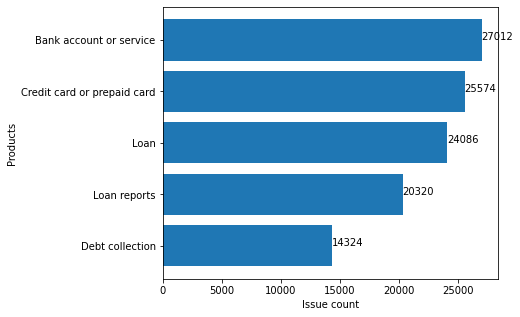

In [44]:
x=list((data.groupby('Product')['Issue'].count().sort_values(ascending=True)).index)
y=list((data.groupby('Product')['Issue'].count().sort_values(ascending=True)).values)
plt.figure(figsize=(6, 5))
plt.barh(x, y)
plt.xlabel('Issue count')
plt.ylabel('Products')
for index, value in enumerate(y):
  plt.text(value, index,str(value))
plt.show()

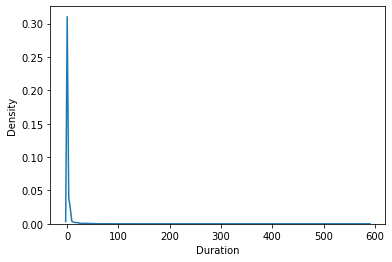

In [45]:
sns.kdeplot(data['Duration'])

In [46]:
data['Duration'].skew()

18.535560489276463

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


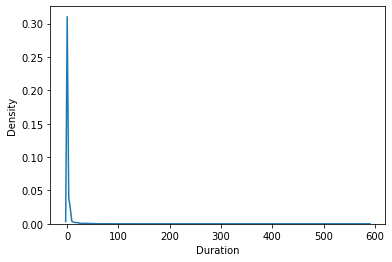

In [47]:
sns.distplot(data['Duration'],hist=False)

In [48]:
sns.set(rc={'figure.figsize':(15,10)})

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


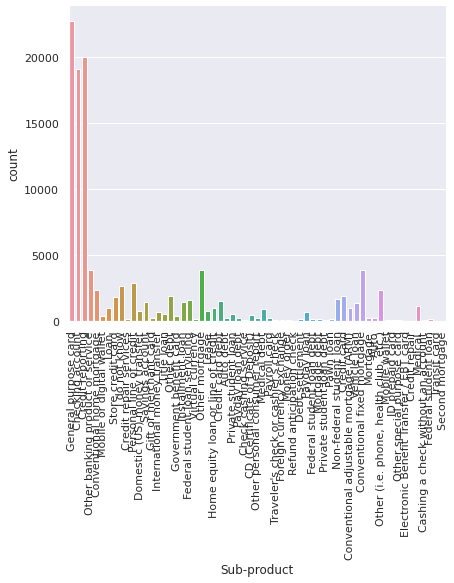

In [49]:
g=sns.factorplot("Sub-product", data=data, aspect=1.5, kind="count")

g.set_xticklabels(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


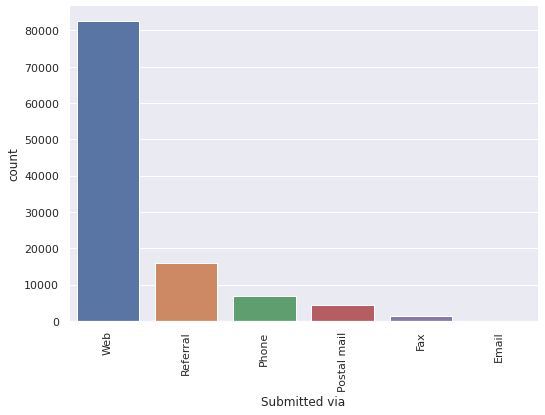

In [50]:
g=sns.factorplot("Submitted via", data=data, aspect=1.5, kind="count")

g.set_xticklabels(rotation=90)

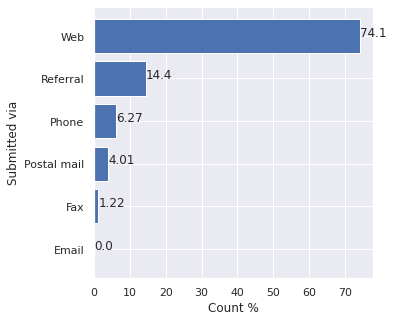

In [51]:
x=list(((data['Submitted via'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).index)
y=list(((data['Submitted via'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).values)
plt.figure(figsize=(5, 5))
plt.barh(x, y)
plt.xlabel('Count %')
plt.ylabel('Submitted via')
for index, value in enumerate(y):
  plt.text(value, index,str(value))
plt.show()

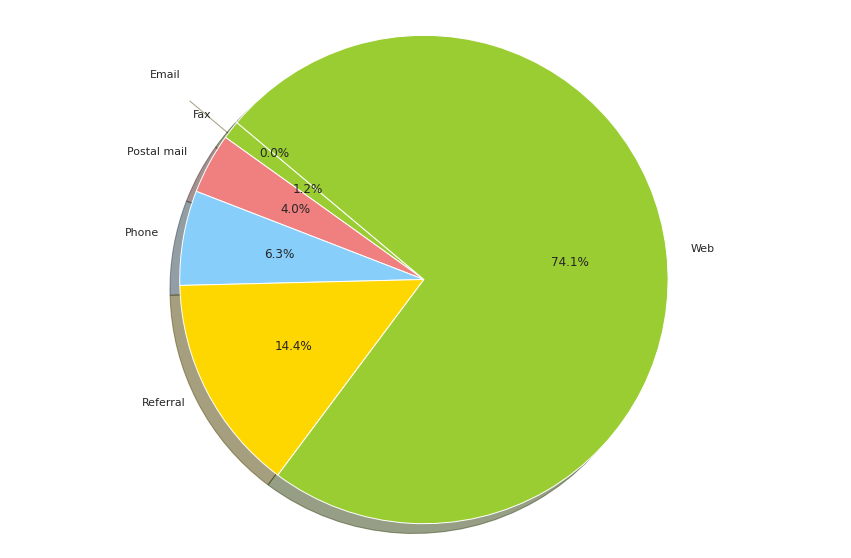

In [52]:
labels = list(((data['Submitted via'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).index)
sizes = list(((data['Submitted via'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).values)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,radius = 0.5)

plt.axis('equal')
plt.show()

In [53]:
data['Company response to consumer'].value_counts()

Closed with non-monetary relief    55660
Closed with monetary relief        55656
Name: Company response to consumer, dtype: int64

In [54]:
# df["Duration"].plot(kind='box')

In [55]:
# duration = df['Duration']
# duration.head()

In [56]:
# q1 = duration.quantile(0.25)
# q3 = duration.quantile(0.75)
# iqr = q3-q1
# ub= q3 + (1.5*iqr)
# lb = q1 -  (1.5*iqr)
# uc = duration.quantile(0.99)
# lc = duration.quantile(0.01)

In [57]:
# for j in duration.index:
#         if duration[j]>ub:
#             duration[j]=ub
#         elif duration[j]<lb:
#             duration[j]=lb

In [58]:
data['Company response to consumer'].value_counts()

Closed with non-monetary relief    55660
Closed with monetary relief        55656
Name: Company response to consumer, dtype: int64

In [59]:
data['Company response to consumer'].value_counts()

Closed with non-monetary relief    55660
Closed with monetary relief        55656
Name: Company response to consumer, dtype: int64

In [60]:
# for i in num_data.columns:
#     q1 = num_data[i].quantile(0.25)
#     q3 = num_data[i].quantile(0.75)
#     iqr = q3-q1
#     ub= q3 + (1.5*iqr)
#     lb = q1 -  (1.5*iqr)
#     uc = num_data[i].quantile(0.99)
#     lc = num_data[i].quantile(0.01)
    
#     for j in num_data[i].index:
#         if num_data.loc[j,i]>ub:
#             num_data.loc[j,i]=uc
#         elif num_data.loc[j,i]<lb:
#             num_data.loc[j,i]=lc


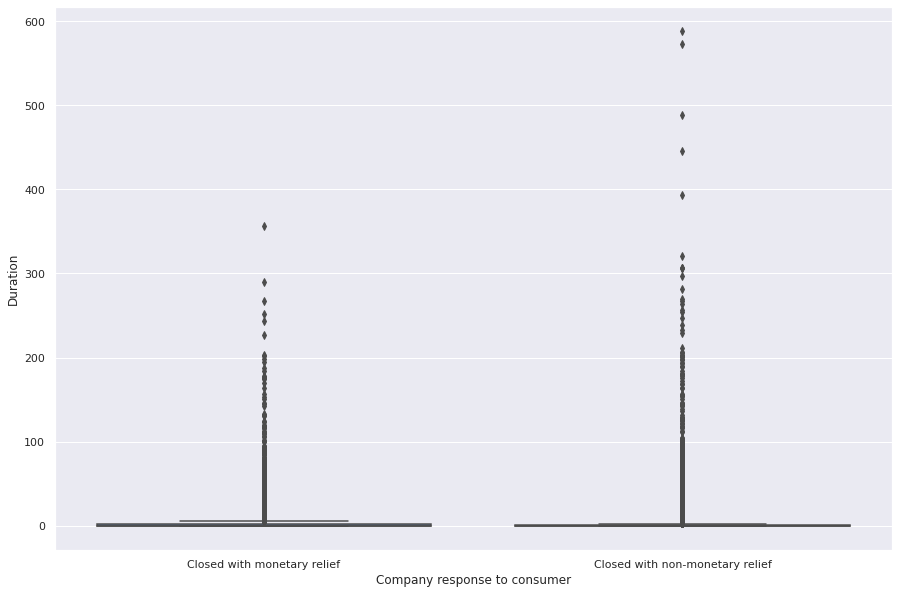

In [62]:
sns.boxplot(x="Company response to consumer", y="Duration", data=data)

plt.show()

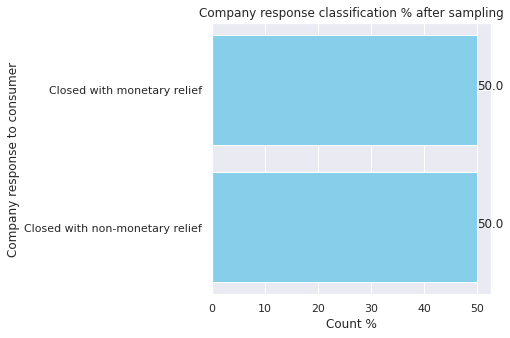

In [65]:
x=list(((data['Company response to consumer'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).index)
y=list(((data['Company response to consumer'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).values)
plt.figure(figsize=(5, 5))
plt.barh(x, y,color=['#87CEEB'])
plt.title('Company response classification % after sampling')
plt.xlabel('Count %')
plt.ylabel('Company response to consumer')
for index, value in enumerate(y):
  plt.text(value, index,str(value))
plt.show()